<a href="https://colab.research.google.com/github/Nikita921999/project/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [2]:
#loading the data from csv file to pandas DataFrame
deadpeople_dataset = pd.read_csv('/content/deadpeople_new.csv')

In [3]:
#print first five rows of DataFrame
deadpeople_dataset.head()

,Name,Gender,Height,Weight,Smoking,Alcohol,Diabetes,Heart_Disease,Blood_Pressure,Driving_Habit,Chronic_disease_history,Sleeping_Hours,Food_habit,Physical_Activity,Environment,Personality,Stress_measure,Age
0,Vicky Gope,Male,159.0,54.0,No,No,No,No,No,Good,None,8 to 10 hrs,Non-Vegeterian,No activity,Clean environment,Introvert,Medium,80
1,Late Adit Gope,Male,150.0,50.0,No,No,No,No,No,Don't drive,None,6 to 8 hrs,Non-Vegeterian,No activity,Clean environment,Extrovert,Low,18
2,Late Mangra Kachhap,Male,165.0,55.0,Yes,Yes,No,No,Yes,Don't drive,Blood Pressure,6 to 8 hrs,Non-Vegeterian,2 hrs,Clean environment,Extrovert,Medium,50
3,Paate Kachhap,Male,160.0,55.0,Yes,Yes,No,No,Yes,Good,Blood Pressure,6 to 8 hrs,Non-Vegeterian,2 hrs,Clean environment,Extrovert,Medium,53
4,Late Cibi Oraon,Female,150.0,45.0,No,Yes,No,No,No,Don't drive,None,8 to 10 hrs,Non-Vegeterian,2 hrs,Clean environment,Extrovert,Low,90


In [4]:
#number of rows and columns
deadpeople_dataset.shape

(90, 18)

In [5]:
#getting some information about the dataset
deadpeople_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     90 non-null     object 
 1   Gender                   90 non-null     object 
 2   Height                   90 non-null     float64
 3   Weight                   90 non-null     float64
 4   Smoking                  90 non-null     object 
 5   Alcohol                  90 non-null     object 
 6   Diabetes                 90 non-null     object 
 7   Heart_Disease            90 non-null     object 
 8   Blood_Pressure           90 non-null     object 
 9   Driving_Habit            90 non-null     object 
 10  Chronic_disease_history  90 non-null     object 
 11  Sleeping_Hours           90 non-null     object 
 12  Food_habit               90 non-null     object 
 13  Physical_Activity        90 non-null     object 
 14  Environment              90 

Categorical Features: 
-Name
-Gender
-Smoking
-Alcohol
-Diabetes
-Heart Disease
-Blood Pressure
-Driving Habit
-Chronic Disease History
-Sleeping Hours
-Food Habit
-Physical Activity
-Environment
-Personality
-Stress level

In [9]:
#checking for missing values
deadpeople_dataset.isnull().sum()

Name                       0
Gender                     0
Height                     0
Weight                     0
Smoking                    0
Alcohol                    0
Diabetes                   0
Heart_Disease              0
Blood_Pressure             0
Driving_Habit              0
Chronic_disease_history    0
Sleeping_Hours             0
Food_habit                 0
Physical_Activity          0
Environment                0
Personality                0
Stress_measure             0
Age                        0
dtype: int64

Data Analysis



In [10]:
#statistical measures of the dataset
deadpeople_dataset.describe()

,Height,Weight,Age
count,90.000000,90.000000,90.000000
mean,163.721778,63.733333,68.011111
std,10.470214,14.275846,15.832334
min,140.000000,42.000000,18.000000
25%,155.000000,52.725000,60.500000
50%,162.000000,61.000000,71.000000
75%,170.000000,70.000000,79.000000
max,190.000000,102.000000,90.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


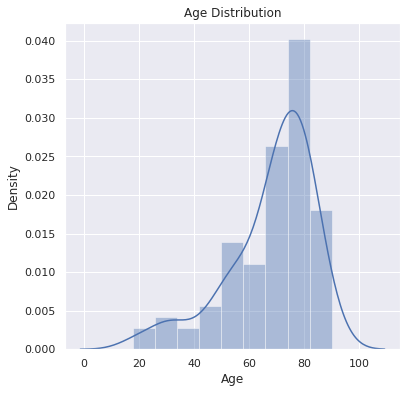

In [11]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(deadpeople_dataset['Age'])
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


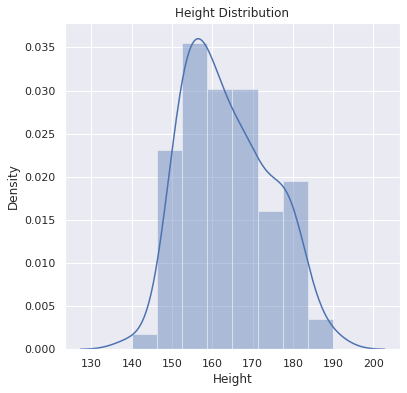

In [12]:
#distribution of height value
plt.figure(figsize=(6,6))
sns.distplot(deadpeople_dataset['Height'])
plt.title('Height Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


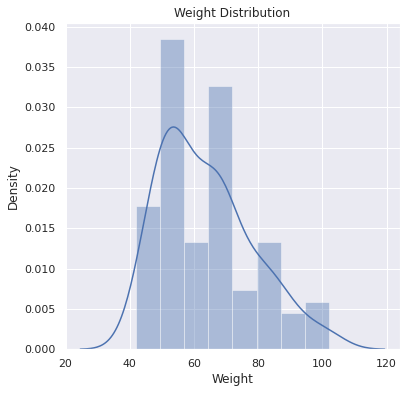

In [13]:
#distribution of weight value
plt.figure(figsize=(6,6))
sns.distplot(deadpeople_dataset['Weight'])
plt.title('Weight Distribution')
plt.show()

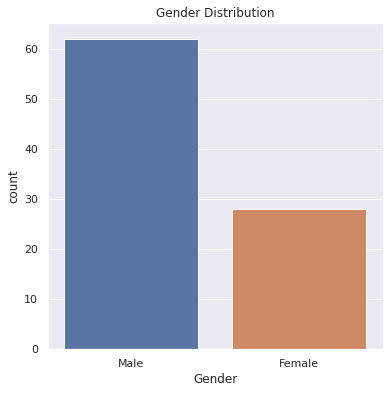

In [14]:
#Distribution of Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=deadpeople_dataset)
plt.title('Gender Distribution')
plt.show()

In [15]:
deadpeople_dataset['Gender'].value_counts()

Male      62
Female    28
Name: Gender, dtype: int64

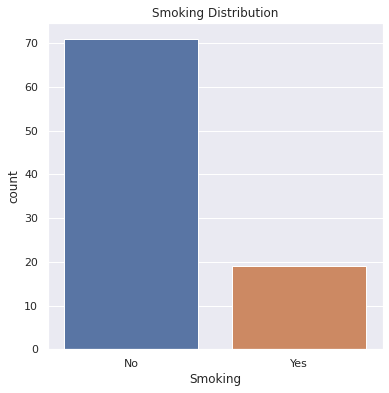

In [16]:
#Distribution of Smoking column
plt.figure(figsize=(6,6))
sns.countplot(x='Smoking',data=deadpeople_dataset)
plt.title('Smoking Distribution')
plt.show()

In [17]:
deadpeople_dataset['Smoking'].value_counts()

No     71
Yes    19
Name: Smoking, dtype: int64

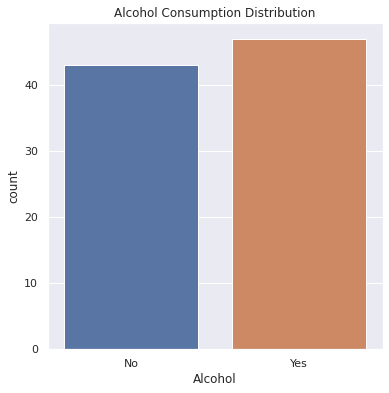

In [18]:
#Distribution of Alcohol column
plt.figure(figsize=(6,6))
sns.countplot(x='Alcohol',data=deadpeople_dataset)
plt.title('Alcohol Consumption Distribution')
plt.show()

In [19]:
deadpeople_dataset['Alcohol'].value_counts()

Yes    47
No     43
Name: Alcohol, dtype: int64

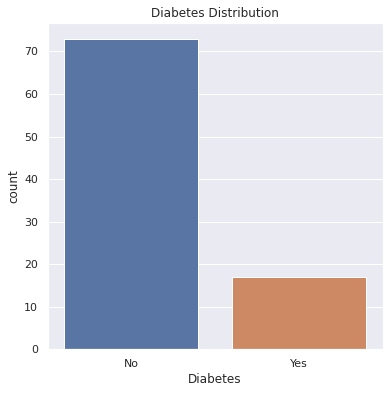

In [20]:
#Distribution of Diabetes column
plt.figure(figsize=(6,6))
sns.countplot(x='Diabetes',data=deadpeople_dataset)
plt.title('Diabetes Distribution')
plt.show()

In [21]:
deadpeople_dataset['Diabetes'].value_counts()

No     73
Yes    17
Name: Diabetes, dtype: int64

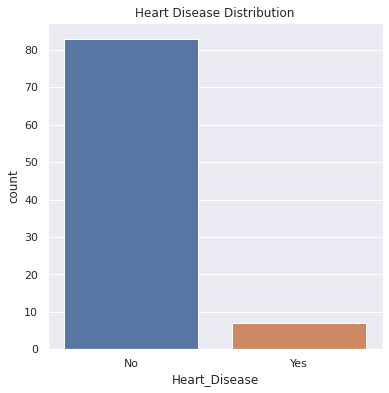

In [22]:
#Distribution of Heart Disease column
plt.figure(figsize=(6,6))
sns.countplot(x='Heart_Disease',data=deadpeople_dataset)
plt.title('Heart Disease Distribution')
plt.show()

In [23]:
deadpeople_dataset['Heart_Disease'].value_counts()

No     83
Yes     7
Name: Heart_Disease, dtype: int64

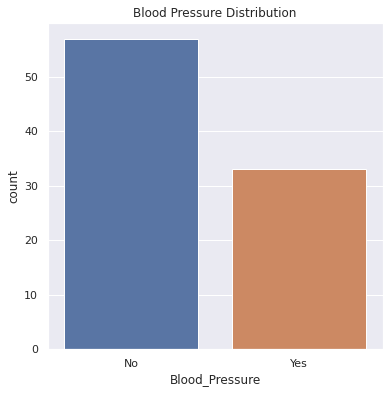

In [24]:
#Distribution of Blood Pressure column
plt.figure(figsize=(6,6))
sns.countplot(x='Blood_Pressure',data=deadpeople_dataset)
plt.title('Blood Pressure Distribution')
plt.show()

In [25]:
deadpeople_dataset['Blood_Pressure'].value_counts()

No     57
Yes    33
Name: Blood_Pressure, dtype: int64

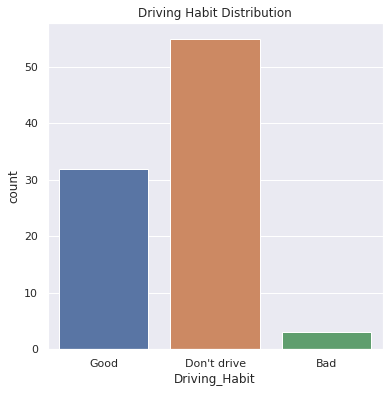

In [26]:
#Distribution of Driving Habit column
plt.figure(figsize=(6,6))
sns.countplot(x='Driving_Habit',data=deadpeople_dataset)
plt.title('Driving Habit Distribution')
plt.show()

In [27]:
deadpeople_dataset['Driving_Habit'].value_counts()

Don't drive    55
Good           32
Bad             3
Name: Driving_Habit, dtype: int64

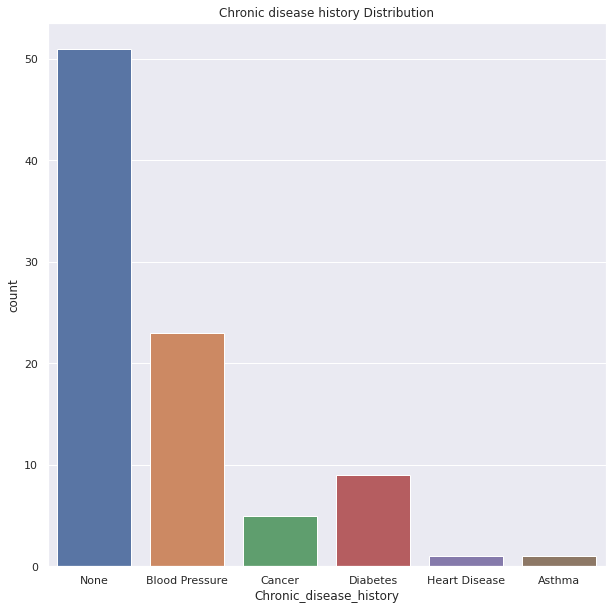

In [28]:
#Distribution of Chronic disease history column
plt.figure(figsize=(10,10))
sns.countplot(x='Chronic_disease_history',data=deadpeople_dataset)
plt.title('Chronic disease history Distribution')
plt.show()

In [29]:
deadpeople_dataset['Chronic_disease_history'].value_counts()

None              51
Blood Pressure    23
Diabetes           9
Cancer             5
Heart Disease      1
Asthma             1
Name: Chronic_disease_history, dtype: int64

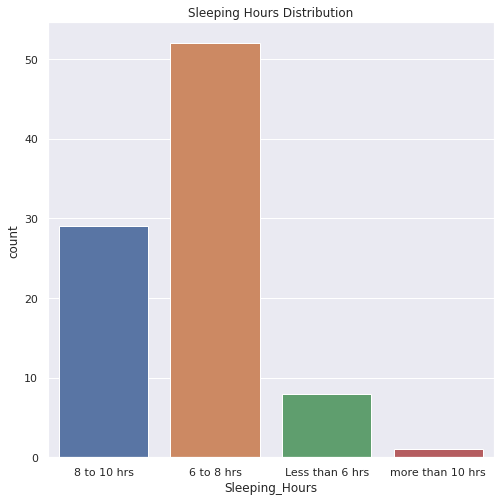

In [30]:
#Distribution of Sleeping Hours column
plt.figure(figsize=(8,8))
sns.countplot(x='Sleeping_Hours',data=deadpeople_dataset)
plt.title('Sleeping Hours Distribution')
plt.show()

In [31]:
deadpeople_dataset['Sleeping_Hours'].value_counts()

6 to 8 hrs          52
8 to 10 hrs         29
Less than 6 hrs      8
more than 10 hrs     1
Name: Sleeping_Hours, dtype: int64

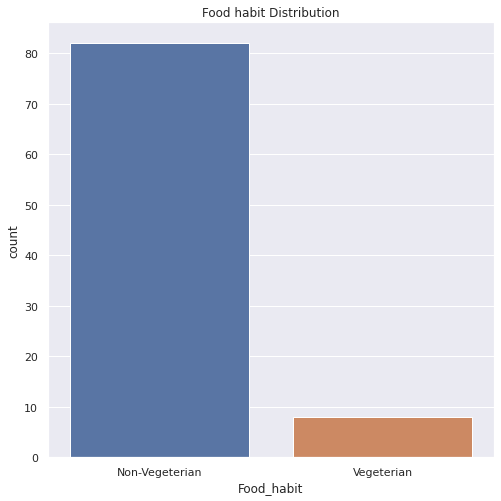

In [32]:
#Distribution of Food habit column
plt.figure(figsize=(8,8))
sns.countplot(x='Food_habit',data=deadpeople_dataset)
plt.title('Food habit Distribution')
plt.show()

In [33]:
deadpeople_dataset['Food_habit'].value_counts()

Non-Vegeterian    82
Vegeterian         8
Name: Food_habit, dtype: int64

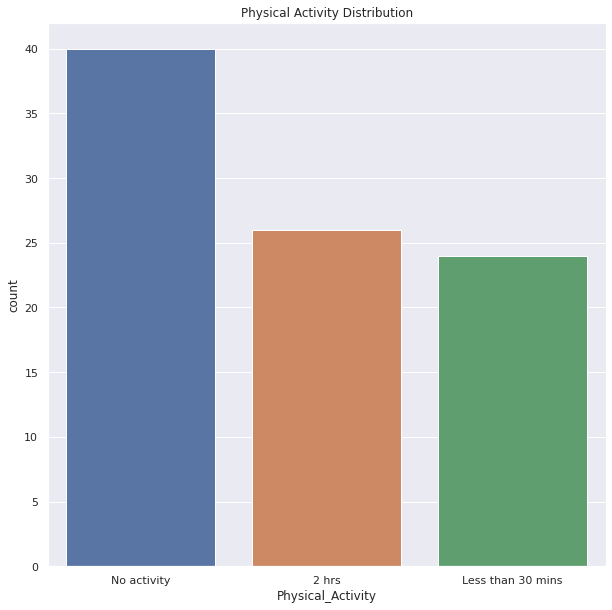

In [34]:
#Distribution of Physical Activity column
plt.figure(figsize=(10,10))
sns.countplot(x='Physical_Activity',data=deadpeople_dataset)
plt.title('Physical Activity Distribution')
plt.show()

In [35]:
deadpeople_dataset['Physical_Activity'].value_counts()

No activity          40
2 hrs                26
Less than 30 mins    24
Name: Physical_Activity, dtype: int64

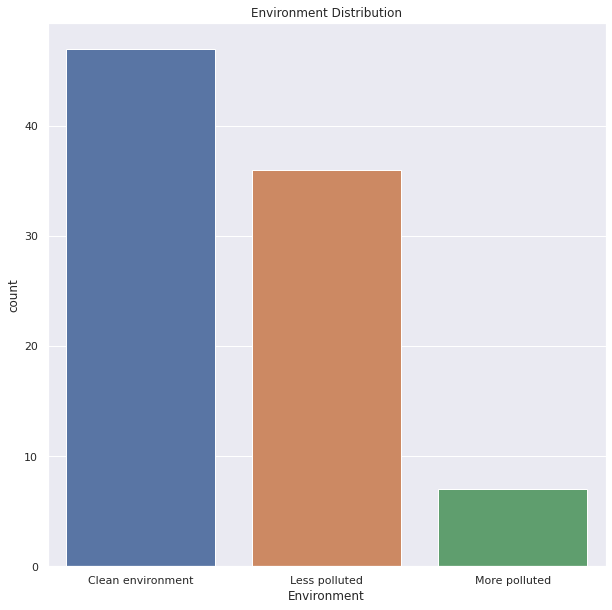

In [36]:
#Distribution of Environment column
plt.figure(figsize=(10,10))
sns.countplot(x='Environment',data=deadpeople_dataset)
plt.title('Environment Distribution')
plt.show()

In [37]:
deadpeople_dataset['Environment'].value_counts()

Clean environment    47
Less polluted        36
More polluted         7
Name: Environment, dtype: int64

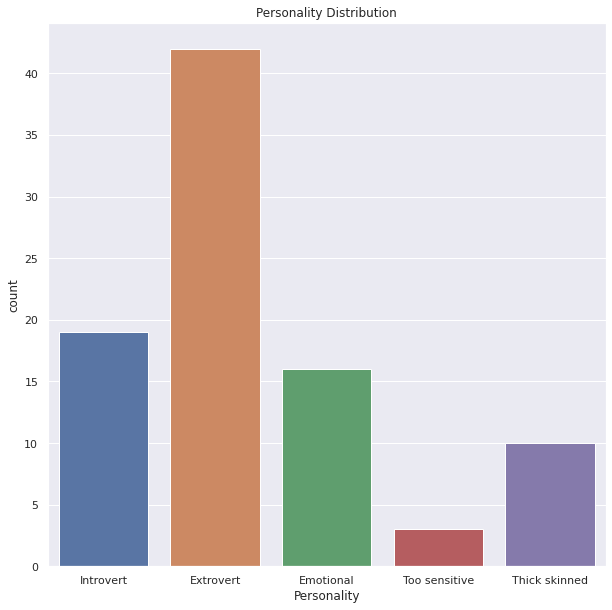

In [38]:
#Distribution of Personality column
plt.figure(figsize=(10,10))
sns.countplot(x='Personality',data=deadpeople_dataset)
plt.title('Personality Distribution')
plt.show()

In [39]:
deadpeople_dataset['Personality'].value_counts()

Extrovert        42
Introvert        19
Emotional        16
Thick skinned    10
Too sensitive     3
Name: Personality, dtype: int64

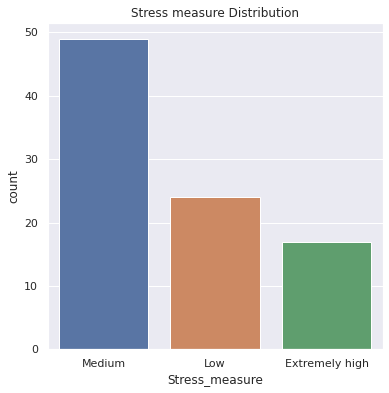

In [40]:
#Distribution of Stress measure column
plt.figure(figsize=(6,6))
sns.countplot(x='Stress_measure',data=deadpeople_dataset)
plt.title('Stress measure Distribution')
plt.show()

In [41]:
deadpeople_dataset['Stress_measure'].value_counts()

Medium            49
Low               24
Extremely high    17
Name: Stress_measure, dtype: int64

Data Pre-processing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(deadpeople_dataset.iloc[:, 1:16],deadpeople_dataset.iloc[:, -1],
                                                    test_size=0.2,random_state=1)

In [43]:
print(X_train)

    Gender  Height  Weight Smoking Alcohol Diabetes Heart_Disease  \
89    Male   180.0    76.0      No      No      Yes           Yes   
70    Male   168.0    65.0     Yes      No       No            No   
53    Male   157.0    78.0     Yes     Yes       No            No   
19    Male   181.0    75.0     Yes     Yes      Yes            No   
84    Male   162.0    80.0      No      No       No            No   
..     ...     ...     ...     ...     ...      ...           ...   
75  Female   152.0    70.0      No      No       No            No   
9   Female   150.0    47.0      No      No       No            No   
72    Male   180.0   102.0      No     Yes       No            No   
12    Male   167.0    54.0      No     Yes       No            No   
37  Female   158.0    65.0      No      No      Yes            No   

   Blood_Pressure Driving_Habit Chronic_disease_history Sleeping_Hours  \
89            Yes   Don't drive          Blood Pressure     6 to 8 hrs   
70             No      

In [44]:
print(X_test)

    Gender  Height  Weight Smoking Alcohol Diabetes Heart_Disease  \
58  Female   154.0    48.0      No     Yes       No            No   
78    Male   175.0    88.0     Yes     Yes       No            No   
43    Male   180.0    69.0      No      No       No            No   
55    Male   176.0    67.7      No      No       No            No   
87    Male   170.0    80.0      No     Yes      Yes           Yes   
74  Female   157.0    95.0      No     Yes       No            No   
60    Male   173.0    52.3      No      No       No            No   
52    Male   179.0    85.0     Yes     Yes       No            No   
46  Female   155.0    45.0      No      No       No            No   
39  Female   157.0    95.0      No     Yes       No            No   
40    Male   158.0    60.0     Yes     Yes       No            No   
31    Male   172.0    75.0      No      No      Yes            No   
69  Female   152.0    68.0      No      No       No            No   
27    Male   155.0    45.0      No

In [45]:
print(y_train)

89    67
70    56
53    56
19    54
84    28
      ..
75    70
9     70
72    68
12    75
37    72
Name: Age, Length: 72, dtype: int64


In [46]:
print(y_test)

58    79
78    65
43    79
55    75
87    79
74    70
60    75
52    32
46    80
39    78
40    77
31    82
69    70
27    90
38    77
68    70
10    90
2     50
Name: Age, dtype: int64


Encoding the categorical features

In [59]:
#encoding Gender column
deadpeople_dataset.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

#encoding Smoking column
deadpeople_dataset.replace({'Smoking':{'Yes':0, 'No':1}}, inplace=True)

#encoding Alcohol column
deadpeople_dataset.replace({'Alcohol':{'Yes':0, 'No':1}}, inplace=True)

#encoding Diabetes column
deadpeople_dataset.replace({'Diabetes':{'Yes':0, 'No':1}}, inplace=True)

#encoding Heart_Disease column
deadpeople_dataset.replace({'Heart_Disease':{'Yes':0, 'No':1}}, inplace=True)

#encoding Blood_Pressure column
deadpeople_dataset.replace({'Blood_Pressure':{'Yes':0, 'No':1}}, inplace=True)

#encoding Food_habit column
deadpeople_dataset.replace({'Food_habit':{'Vegeterian':0, 'Non-Vegeterian':1}}, inplace=True)

#encoding Driving_Habit column
deadpeople_dataset.replace({'Driving_Habit':{'Bad':0, 'Good':1, 'Don\'t drive':2}} , inplace=True)

#encoding Chronic_disease_history column
deadpeople_dataset.replace({'Chronic_disease_history':{'Cancer':0, 'Heart Disease':1, 'Diabetes':2, 'Blood Pressure':3,
                                                       'Asthma':4, 'None':5}} , inplace=True)

#encoding Sleeping_Hours column
deadpeople_dataset.replace({'Sleeping_Hours':{'Less than 6 hrs':0, '6 to 8 hrs':1, '8 to 10 hrs':2, 'more than 10 hrs':3
                                          }} , inplace=True)

#encoding Physical_Activity column
deadpeople_dataset.replace({'Physical_Activity':{'No activity':0, 'Less than 30 mins':1, '2 hrs':2}} , inplace=True)

#encoding Environment column
deadpeople_dataset.replace({'Environment':{'More polluted':0, 'Less polluted':1, 'Clean environment':2}} , inplace=True)

#encoding Personality column
deadpeople_dataset.replace({'Personality':{'Extrovert':0, 'Introvert':1, 'Emotional':2, 'Thick skinned':3, 
                                           'Too sensitive':4}} , inplace=True)

#encoding Stress_measure column
deadpeople_dataset.replace({'Stress_measure':{'Extremely high':0, 'Medium':1, 'Low':2}} , inplace=True)


In [61]:
deadpeople_dataset.head(90)

,Name,Gender,Height,Weight,Smoking,Alcohol,Diabetes,Heart_Disease,Blood_Pressure,Driving_Habit,Chronic_disease_history,Sleeping_Hours,Food_habit,Physical_Activity,Environment,Personality,Stress_measure,Age
0,Vicky Gope,0,159.0,54.0,1,1,1,1,1,1,5,2,1,0,2,1,1,80
1,Late Adit Gope,0,150.0,50.0,1,1,1,1,1,2,5,1,1,0,2,0,2,18
2,Late Mangra Kachhap,0,165.0,55.0,0,0,1,1,0,2,3,1,1,2,2,0,1,50
3,Paate Kachhap,0,160.0,55.0,0,0,1,1,0,1,3,1,1,2,2,0,1,53
4,Late Cibi Oraon,1,150.0,45.0,1,0,1,1,1,2,5,2,1,2,2,0,2,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Late Sita Devi Bansal,1,152.0,65.0,1,1,1,1,1,2,2,1,0,2,2,1,2,67
86,Lt. Maloti Topno,1,150.0,60.0,1,1,0,1,0,2,3,2,1,2,2,0,2,70
87,Late Flavius kujur,0,170.0,80.0,1,0,0,0,0,2,2,2,1,0,1,0,2,79
88,Late Ignace,0,190.0,86.0,1,0,1,1,1,2,5,1,1,0,2,3,2,76


Splitting the Features and Target

In [70]:
X = deadpeople_dataset.iloc[:, 1:-1].values
y = deadpeople_dataset.iloc[:, -1].values

In [71]:
print(X)

[[  0. 159.  54. ...   2.   1.   1.]
 [  0. 150.  50. ...   2.   0.   2.]
 [  0. 165.  55. ...   2.   0.   1.]
 ...
 [  0. 170.  80. ...   1.   0.   2.]
 [  0. 190.  86. ...   2.   3.   2.]
 [  0. 180.  76. ...   2.   3.   1.]]


In [72]:
print(y)

[80 18 50 53 90 60 65 62 85 70 90 30 75 64 45 45 85 75 45 54 75 22 55 80
 83 55 60 90 85 76 70 82 82 85 83 80 65 72 77 78 77 74 75 79 70 35 80 79
 34 80 79 56 32 56 73 75 77 79 79 77 75 78 81 69 87 82 70 68 70 70 56 80
 68 70 70 70 65 48 65 80 53 72 70 55 28 67 70 79 76 67]


Splitting Data into Training data and Testing data

In [73]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [74]:
print(X.shape , X_train.shape , X_test.shape)

(90, 16) (72, 16) (18, 16)


Model Training

In [75]:
#loading Linear Regression Model
regressor = LinearRegression()

In [76]:
regressor.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [77]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [78]:
#R squared value
r2_train = metrics.r2_score(y_train , training_data_prediction)
print('R squared value :' , r2_train)

R squared value : 0.2813001623031267


In [79]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [80]:
#R squared value
r2_test = metrics.r2_score(y_test , test_data_prediction)
print('R squared value :' , r2_test)

R squared value : -0.03474480031169547


Building a Predictive System

In [83]:
input_data = (0,165.0,55.0,0,0,1,1,0,2,3,1,1,2,2,0,1)

#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The life expectancy of individual is', prediction[0])

[56.55606553]
The life expectancy of individual is 56.55606552512327
